# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
import glob
import pandas as pd
import numpy as np

DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

<span style="color:blue">First we need to to import data into one Dataframe, so we iterate over the different file for the country and inside over the different date and we create a list of DataFrame that will be concatenated using pd.concat. For each 
dataFrame we load in the files we add a info in it named country with the name of the country of which the file give information so that we will be able to know them for the future.<br><br>
Now because of the difference in the way the data has been put in the database of the 3 country, we will need to get 
the info from them separately. So for each country :
<br>
For the Guinea from the main dataframe we get in 2 different dataframes all the totals of death (from the column "Totals" of the new cases (from lines having 'Total new cases registered so far' as Description) and death (from lines that have ""New deaths registered"" as Description) from the country 'Guinea. For the 2 dataframe we then change the name "Totals" to respectively "New Cases" and "Death" so that when we merge them we have a 4 columns database that differentiate new cases and death and so that once we have all the the databses from the country the name will be the same for all, this way of renaming will be applied for all the next country for the same goal. We next change the date to have only the yar and month so that we can group line together by months and get the mean by day.
<br>
For the Liberia we will once again create 2 dataframes one for death and one for new cases only changing the name of the column and of the description needed, but this time we have more than one line for each day so for each day we will need to group them and sum them so that we have 1 number by day for both Dataframe. The problem here is that the death is cumulative so we will need to calculate the difference for every day so that we have a dataframe of death of death between 2 dates, once we have that dataframe we can group all of that by month and calculate the mean (using the number of day by month or the number of day from the begining of the report to the end of the month or the begining of the month to the end of the report)(note: this will not be absolutely precise but as we can not know exactly when a death occurs, it is as precise as possible)(note: we could have taken only the greatest value or the last value for our mean but that would leave us open to great imprecision if this value happens to be dirty). For the "new cases" dataFrame we used the same method as Guinea to establish a mean. Once this is done we only need to merge the 2 dataframe together to have the result.
<br>
For Sierra Leone it is like the Liberia at the exception that this time the report has been done every day so we do not need all the complicated mean for death so we can just use mean() to get the mean.
<br><br>
Finally once we have the 3 table we just have to append them to have the results.</span>

In [3]:
listConcat = []

ebolaFolder = DATA_FOLDER + "ebola/"
allFiles = glob.glob(DATA_FOLDER + "ebola/*")

for doc in allFiles:
    if (doc != ".DS_Store") :
        country = doc.split("/")[-1].split("_")[0]
        allCsv = glob.glob(doc + "/*.csv")
        
        for file_ in allCsv:
            newCsv = pd.read_csv(file_)
            newCsv["Country"] = country
            listConcat.append(newCsv)

ebolaFrame = pd.concat(listConcat)
ebolaFrame.head()

,34 Military Hospital,Beyla,Bo,Bo EMC,Boffa,Bombali,Bomi County,Bong County,Bonthe,Conakry,...,Totals,Unnamed: 18,Variable,Western area,Western area combined,Western area rural,Western area urban,Yomou,date,variable
0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,6,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,9,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def guineaParseDate(a) :
    return a.split("-")[0] + "-" + a.split("-")[1]

guineaFrameDeath = ebolaFrame[(ebolaFrame.Country == "guinea") & ((ebolaFrame.Description=="New deaths registered"))][["Date", "Country", "Totals"]]
guineaFrameNewCases = ebolaFrame[(ebolaFrame.Country == "guinea") &(ebolaFrame.Description == "Total new cases registered so far") ][ ["Date", "Country", "Totals"]]
guineaFrameDeath= guineaFrameDeath.rename(columns={"Totals" : "Death"})
guineaFrameNewCases= guineaFrameNewCases.rename(columns={"Totals" : "New Cases"})
guineaFrame = pd.merge(guineaFrameNewCases , guineaFrameDeath , on = ["Date","Country"] , how='inner')

guineaFrame["Death"] = pd.to_numeric(guineaFrame["Death"]).fillna(0)
guineaFrame["New Cases"] = pd.to_numeric(guineaFrame["New Cases"]).fillna(0)
guineaFrame["Date"] = guineaFrame["Date"].map(guineaParseDate)
guineaFrame = guineaFrame.groupby(["Date", "Country"], as_index=False).mean()


guineaFrame

,Date,Country,New Cases,Death
0,2014-08,guinea,30.000,3.7500
1,2014-09,guinea,19.625,3.5625
2,2014-10,guinea,34.000,15.0000


In [5]:
def liberiaParseDate(a) :
    monthTry = a.split("/")[0]
    yearTry = a.split("/")[2]
    
    if (len(monthTry) == 1) :
        monthTry = '0' + monthTry
        
    if (len(yearTry) < 4) :
        yearTry = "20" + yearTry
        
    return yearTry + '-' + monthTry 

liberiaFrameDeath = (ebolaFrame[(ebolaFrame.Country == "liberia") & ((ebolaFrame.Variable == 'Total death/s in confirmed, \n probable, suspected cases') 
                                                               | (ebolaFrame.Variable == 'Total death/s in confirmed, probable, suspected cases'))][["Date","Country","National"]]).dropna()
liberiaFrameDeath= liberiaFrameDeath.rename(columns={"National" : "Death"})
liberiaFrameDeath["Death"] = pd.to_numeric(liberiaFrameDeath["Death"])
liberiaFrameDeath = liberiaFrameDeath.groupby(["Date","Country"], as_index=False).sum()
liberiaFrameDeath["Death"] =liberiaFrameDeath["Death"].rolling(window=2,center=False).apply(lambda x: x[1] - x[0])
liberiaFrameDeath["Death"] = liberiaFrameDeath["Death"].map( lambda x: 0 if (x <0)  else  x).fillna(0)
liberiaFrameDeath["Date"] = liberiaFrameDeath["Date"].map(liberiaParseDate)
liberiaFrameDeath = liberiaFrameDeath.groupby(["Date","Country"], as_index=False).sum()
monthNbDay = [30-16,31,31,30,31,30,9]
liberiaFrameDeath['Death'] = pd.DataFrame(liberiaFrameDeath['Death'].values/monthNbDay)

liberiaFrameNW = ebolaFrame[(ebolaFrame.Country == "liberia") & ((ebolaFrame.Variable == "New Case/s (Suspected)")
                                                              | (ebolaFrame.Variable == "New Case/s (Probable)")
                                                              | (ebolaFrame.Variable == "New case/s (confirmed)"))][["Date","Country","National"]]
liberiaFrameNW["National"] = pd.to_numeric(liberiaFrameNW["National"]).fillna(0)
liberiaFrameNW= liberiaFrameNW.rename(columns={"National" : "New Cases"})
liberiaFrameNW = liberiaFrameNW.groupby(["Date","Country"], as_index=False).sum()
liberiaFrameNW["Date"] = liberiaFrameNW["Date"].map(liberiaParseDate)
liberiaFrameNW = liberiaFrameNW.groupby(["Date","Country"], as_index=False).mean()

liberiaFrame = pd.merge(liberiaFrameNW , liberiaFrameDeath , on = ["Date","Country"] , how='inner')

liberiaFrame

#liberiaFrameDeath["Death"] = liberiaFrameDeath[~(pd.isnull(liberiaFrameDeath['Death'] )) ]


,Date,Country,New Cases,Death
0,2014-06,liberia,5.714286,2.357143
1,2014-07,liberia,8.545455,4.774194
2,2014-08,liberia,37.222222,35.903226
3,2014-09,liberia,63.833333,116.566667
4,2014-10,liberia,45.560000,118.806452
5,2014-11,liberia,26.466667,72.066667
6,2014-12,liberia,5178.555556,234.555556


In [6]:
slFrameNew = ebolaFrame[(ebolaFrame.Country == "sl") & (ebolaFrame.variable.str.startswith('new_') & (False == (ebolaFrame.variable.str.contains('contacts')))   )][["date","Country","National"]]
slFrameNew["National"] = pd.to_numeric(slFrameNew["National"]).fillna(0)
slFrameNew=slFrameNew.rename(columns={"date" : "Date", "National" : "New Cases"})
slFrameNew = slFrameNew.groupby(["Date","Country"], as_index=False).sum()
#the date has the same structure in Sierra Leoneand in guinea so we used the same parser
slFrameNew["Date"] = slFrameNew["Date"].map(guineaParseDate)
slFrameNew = slFrameNew.groupby(["Date","Country"], as_index=False).mean()


slFrameDeath = ebolaFrame[(ebolaFrame.Country == "sl") & ((ebolaFrame.variable.str.startswith('death_')))][["date",'variable',"Country","National"]]
slFrameDeath["National"] = pd.to_numeric(slFrameDeath["National"])
slFrameDeath=slFrameDeath.rename(columns={"date" : "Date", "National" : "Death"})
slFrameDeath = slFrameDeath.groupby(["Date","Country"], as_index=False).sum()
slFrameDeath['Death']= slFrameDeath['Death'].rolling(window=2,center=False).apply(lambda x: x[1] - x[0]).fillna(0)
slFrameDeath["Date"] = slFrameDeath["Date"].map(guineaParseDate)
slFrameDeath = slFrameDeath.groupby(["Date","Country"], as_index=False).mean()




slFrame = pd.merge(slFrameNew , slFrameDeath , on = ["Date","Country"] , how='inner')






#& (False == (ebolaFrame.variable.str.contains('contacts')))

slFrame

,Date,Country,New Cases,Death
0,2014-08,sl,34.850000,5.100000
1,2014-09,sl,67.931034,4.413793
2,2014-10,sl,191.678571,29.892857
3,2014-11,sl,381.190476,17.047619
4,2014-12,sl,310.600000,42.400000


In [7]:
pd.concat([guineaFrame, liberiaFrame, slFrame])



,Date,Country,New Cases,Death
0,2014-08,guinea,30.000000,3.750000
1,2014-09,guinea,19.625000,3.562500
2,2014-10,guinea,34.000000,15.000000
0,2014-06,liberia,5.714286,2.357143
1,2014-07,liberia,8.545455,4.774194
2,2014-08,liberia,37.222222,35.903226
3,2014-09,liberia,63.833333,116.566667
4,2014-10,liberia,45.560000,118.806452
5,2014-11,liberia,26.466667,72.066667
6,2014-12,liberia,5178.555556,234.555556


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

<span style="color:blue">We first need a single DataFrame so we iterate over the file of microbiome but for each dataframe we load we call
the result of the experience by the name of the file so that we can differentiate each result for each element. We 
concatenate all of them in one file that will have 10 columns (1 for the name of what we test, and one for each of
the file).
Now we need to merge the info of all the different lines that have the same product, to do that we will group the lines 
by product and we sum the lines, the reason is because of the way we loaded the data, we now have in each groups 9 
lines with only 1 columns filed that are different for each line and all the rest are NaN value. So when we sum by 
column the sum will add the result for each column ignoring the NaN so we will be left with all the result on 1 line
(or NaN if from the begining we did not have the value).
Next we load the information we want to add in a DataFrame and because the name of the columns is exactly the same 
that the index of each line from the file loaded, we can just iterate over the contant of the new DataFrame to change
the name of the column (just naming the group for MID1, and for the other do the group : the sample)
Next we just have to use fillna to change the NaN to 'unknown'</span>

In [8]:
listConcat = []

allFiles = glob.glob(DATA_FOLDER + "microbiome/MID*.xls")

for file_ in allFiles:    
    newCsv = pd.read_excel(file_, sheetname='Sheet 1', header=None)
    newCsv = newCsv.rename(columns={0 : "name", 1 : file_.split("/")[-1].split(".")[0]})
    listConcat.append(newCsv)

header = pd.read_excel(DATA_FOLDER + "microbiome/metadata.xls", sheetname='Sheet1', header=None)
headerArray = header.values

RNAFrame = pd.concat(listConcat)
RNAFrame = RNAFrame.groupby("name").sum()
RNAFrame = RNAFrame.rename(columns={headerArray[1][0] : headerArray[1][1]})

for i in range (2, len(headerArray)) :
    RNAFrame = RNAFrame.rename(columns={headerArray[i][0] : headerArray[i][1] + " : " + str(headerArray[i][2])})
    
RNAFrame = RNAFrame.fillna('unknown')
RNAFrame

,EXTRACTION CONTROL,NEC 1 : tissue,Control 1 : tissue,NEC 2 : tissue,Control 2 : tissue,NEC 1 : stool,Control 1 : stool,NEC 2 : stool,Control 2 : stool
name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus",unknown,1,unknown,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium",unknown,unknown,3,unknown,2,1,1,unknown,5


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [9]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
HTML(filename=DATA_FOLDER + '/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

<span style="color:blue">Because we just need to create graphics, we only need to load the data of the titanic, take the value we want from it and use the matplotlib to put it in a class. We put `plt.gcf().clear()` at the beggining of each creation of graphic so that the exercises do not cause problems between them.</span>

In [10]:
titanic = pd.read_excel(DATA_FOLDER + "titanic.xls")
titanic.head()
titanicCopy = titanic.copy()

<span style="color:blue">1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. <br><br>
First let's investigate the type and the range for each attribute:</span>

In [11]:
types = titanic.dtypes
names = titanic.columns

for i in range(len(types)) :
    if ((types[i] == np.float64) | (types[i] == np.int64)):
        print("Attribute '" + str(names[i]) + "' is type " + str(types[i]) + " going from " + str(titanic[names[i]].min()) + " to " + str(titanic[names[i]].max()))
    else :
        print("Attribute '" + str(names[i]) + "' is type " + str(types[i]))


Attribute 'pclass' is type int64 going from 1 to 3
Attribute 'survived' is type int64 going from 0 to 1
Attribute 'name' is type object
Attribute 'sex' is type object
Attribute 'age' is type float64 going from 0.1667 to 80.0
Attribute 'sibsp' is type int64 going from 0 to 8
Attribute 'parch' is type int64 going from 0 to 9
Attribute 'ticket' is type object
Attribute 'fare' is type float64 going from 0.0 to 512.3292
Attribute 'cabin' is type object
Attribute 'embarked' is type object
Attribute 'boat' is type object
Attribute 'body' is type float64 going from 1.0 to 328.0
Attribute 'home.dest' is type object


<span style="color:blue"> According to Pandas documentation, "_categoricals are a pandas data type which can take only a limited, and usually fixed, number of possible values_". Thus, we can say the following concerning each attribute:</span>

- _pclass_ is limited to 3 levels corresponding to the three booking class, thus transforming this attribute to a categorical type will save memory. Actually, storing it as a categorical type it will use roughly the length of the dataframe in bytes (as three categories can be encoded over one byte), whether storing it as an int64 uses roughly 8 times the length of the data in bytes.
- _survived_ -- is limited to 2 levels. For the same reason, we should encoded it as a categorical attribute.
- _name_ -- is by essence unique to any passenger, it is then not an attribute to consider as categorical.
- _sex_ -- is limited to 2 levels, it is then highly recommended to store it as a categorical type
- _age_ -- is a continous attribute by design. We should consider to discretize it first and then encode it as categorical. However, this is usually not adviced as we delete information.
- _sibsp_ -- could be encoded as it takes integer values from 0 to 8. This would save memory, and categories can have labels from 0 to 8. However, this loses possibility to apply functions such as _min_, _max_ or _mean_ which are naturally handle by integer values (even though we can give a hierarchy to categorical values, it is not an optimal solution in this case). Thus, we do not recommend to categorize this attribute.
- _parch_  -- same reasoning than the previous atribute.
- _ticket_ -- it would not make that much sense to make categories as there is 939 different ticket numbers (and as many categories). There is no memory to save here and it is more intuitive to keep them as it.
- _fare_ -- could make sense to reprensent it as a categorical value as there is only 281 different values. However, as it has no clear interpretation of what these categories would represent (other than the fare amount), it is more intuitive to keep them as it. Moreover, we would also loose the advantages of using integers.
- _cabin_ -- has 187 levels (with few passengers having to room assigned). It is then possible to categorized with the room as label. However, to be able to manipulate this attribute as str later, we keep it as object.
- _embarked_ -- is definitely categorizable as it is limited to 3 levels.
- _boat_ -- is categorizable as it has only 23 different levels.
- _body_ -- is by design attributed indivually to passengers. Thus, it does not make sense to categorized it.
- _home.dest_ -- is also an individual feature (many different values) which is not suitable to be categorized.

<span style="color:blue"> To summarize the following attributes will be categorized: _pclass_, _survived_, _sex_, _embarked_, and _boat_. Let's check the memory usage of our dataframe before transformation:</span>

In [12]:
titanic.memory_usage()

Index           80
pclass       10472
survived     10472
name         10472
sex          10472
age          10472
sibsp        10472
parch        10472
ticket       10472
fare         10472
cabin        10472
embarked     10472
boat         10472
body         10472
home.dest    10472
dtype: int64

In [13]:
def changeClass(x) :
    return "class " + str(x) + " "

def changeBoat(x):
    return "boat " + str(x) + " "

titanic['pclass'] = titanicCopy['pclass'].map(changeClass, na_action='ignore').astype('category')
titanic['survived'] = titanicCopy['survived'].map({1 : 'survived', 0 : 'dead'}).astype('category')
titanic['sex'] = titanicCopy['sex'].astype('category')
titanic['boat']  = titanicCopy['boat'].map(changeBoat, na_action='ignore').astype('category')
titanic['embarked'] = titanicCopy['embarked'].map({'S' : 'Southampton','Q' : 'Queenstown','C' : 'Cherbourg'}).astype('category')

titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,class 1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,boat 2,NaN,"St Louis, MO"
1,class 1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,boat 11,NaN,"Montreal, PQ / Chesterville, ON"
2,class 1,dead,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,class 1,dead,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,class 1,dead,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,class 1,survived,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,Southampton,boat 3,NaN,"New York, NY"
6,class 1,survived,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,Southampton,boat 10,NaN,"Hudson, NY"
7,class 1,dead,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,Southampton,NaN,NaN,"Belfast, NI"
8,class 1,survived,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,Southampton,boat D,NaN,"Bayside, Queens, NY"
9,class 1,dead,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay"


<span style="color:blue">We can see that we significantly decreased the memory used to stored the attribute we transformed:</span>

In [14]:
titanic.memory_usage()

Index           80
pclass        1413
survived      1405
name         10472
sex           1405
age          10472
sibsp        10472
parch        10472
ticket       10472
fare         10472
cabin        10472
embarked      1413
boat          2805
body         10472
home.dest    10472
dtype: int64

<span style=color:blue>2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.<br><br>
We choosed to drop NA values before to plot as they are undetermined.</span>

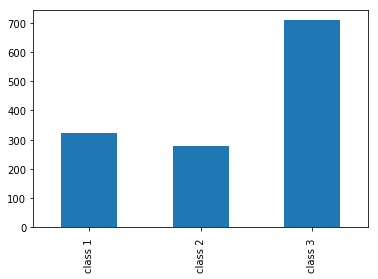

In [15]:
# Travel class 
plt.gcf().clear()
titanic.pclass.dropna().value_counts().sort_index().plot(kind='bar').figure

<span style="color:blue">We can see that booking class were unequally represented on the titanic. Passengers in the third class outnumber both passengers in first and second together. Roughly the distribution of passengers among classes (first, second, third) is 1/4, 1/4 and 1/2.</span>

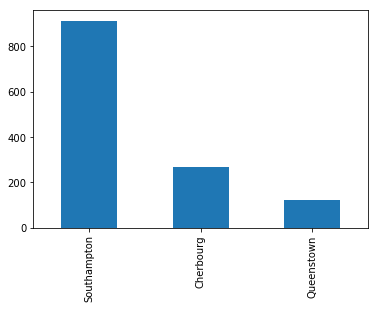

In [16]:
# Embarkation port

plt.gcf().clear()
titanic.embarked.dropna().value_counts().plot(kind='bar').figure

<span style="color:blue">We also notice that the embarkation port is not equally distributed and fewer passengers embarqued as the boat was on her way to New York. Most of the passengers embarqued at the first departure port in Southampton (Britain). Then the boat when to Chersbourg (France) and finally Queenstorn (Ireland) before to head to New York.</span>

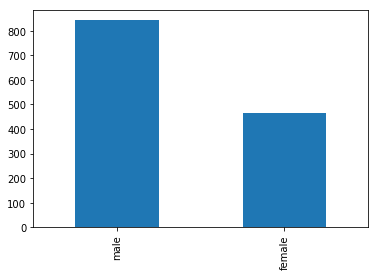

In [17]:
# Sex 

plt.gcf().clear()
mfTitanic = titanic["sex"].dropna().value_counts().plot(kind='bar')
mfTitanic.figure

<span style="color:blue">We can also see that the distribution of gender was not equal on the Titanic. And there is an explanation: it possible to show that many Jacks (single men looking for a bright future in the US) were actually on board (mostly third class passengers).</span>

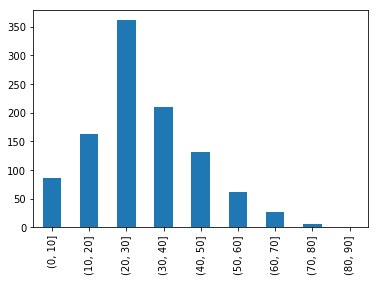

In [18]:
# Age

plt.gcf().clear()
pd.cut(titanic.age.dropna(), [0,10,20,30,40,50,60,70,80,90]).value_counts().sort_index().plot(kind='bar').figure

<span style="color:blue">The age distribution reflects the same aspect. Many young people seeking for a career in the US were on board of the ship.</span>

<span style="color:blue">3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.<br><br> From looking at the boat, we consider that the cabin floor is equivalent to the letter on the cabin.<br>We consider that a double on a line of ticket is a person that is assigned two cabin because of buying them with another person so the cabin will be under the person that will use this cabin, so a double will only count for 1 person on a deck.<br>
We consider that in case of a double we cannot know for certitude which one is the room used by the person so we will take one randomly to hope to attain some approximation of the reality.<br>
Using http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/ , we are able to give more accurate name using the letter from the cabin</span>

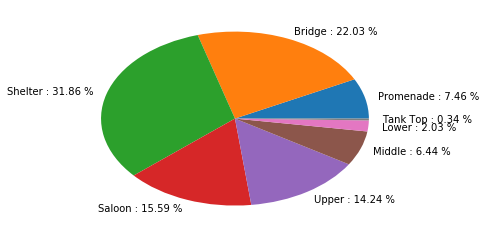

In [19]:
import random

def ticketTofloor(x) :
    split = str(x).split(' ')
    if (len(split) == 1) :
        return split[0][0]
    else :
        return split[random.randint(0, len(split) - 1)][0]

plt.gcf().clear()
mapName = {'A' : 'Promenade',\
           'B' : 'Bridge',\
           'C' : 'Shelter',\
           'D' : 'Saloon',\
           'E' : 'Upper',\
           'F' : 'Middle',\
           'G' : 'Lower',\
           'T' : 'Tank Top'}

cabinTitanic = titanic['cabin'].dropna().map(ticketTofloor, na_action='ignore').value_counts().sort_index()
total = cabinTitanic.values.sum()
plt.pie(cabinTitanic, labels=[mapName[cabinTitanic.index.values[x]] + " : " + str(round(100 * cabinTitanic.values[x] / total, 2)) + " %" for x in range(len(cabinTitanic.index))])
plt.show()

<span style="color:blue">_Lower_ and _Tank top_ were accomodated only for crew members which explains the low proportion of passengers on these decks. Other decks reflects the different booking class distribution according to the allocation of cabins classes on each deck.</span>

<span style="color:blue">4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.</span>

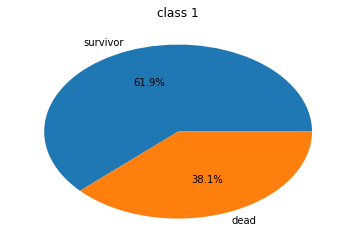

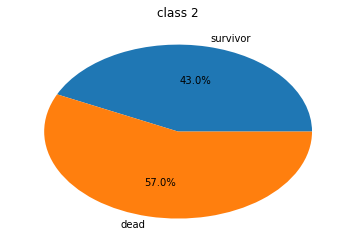

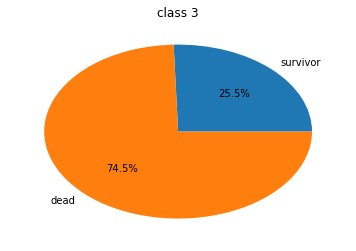

In [22]:
plt.gcf().clear()


for i in range ( 1 , 4 ) :
    total = titanic [(titanic.pclass =='class '+str(i)+' ')]['survived'].count()
    survivor = titanic [(titanic.pclass =='class '+str(i)+' ') & (titanic.survived == 'survived') ]['survived'].count()
    dead = titanic [(titanic.pclass =='class '+str(i)+' ') & (titanic.survived == 'dead') ]['survived'].count()
    plt.title('class '+str(i))
    plt.pie([survivor,dead],labels = ['survivor' , 'dead'],autopct='%1.1f%%')
    plt.show()



<span style="color:blue">Looking at this pie chart alone may not show an alarming result. The lower class you are the less chance of surviving you have, it even goes as far as a class 1 passenger having more than twice as much chance than a class 3 passenger. Clearly, the probality to survive was unequal given the booking class of the passenger. The explanation of such a result is very well known. Passenger of first and second were able to disembark first when the boat was sinking.</span>

<span style="color:blue">5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.</span>

In [ ]:
plt.gcf().clear()
survivor = titanic[titanic.survived == 'survived']
classSexSurvivorTitanic=(survivor['pclass'].astype('object') + survivor['sex'].astype('object')).value_counts().sort_index()

classSexTotalTitanic = (titanic['pclass'].astype('object') + titanic['sex'].astype('object')).value_counts().sort_index()

(classSexSurvivorTitanic/classSexTotalTitanic).plot.bar().figure


<span style="color:blue">On top of the class disparity seen at the previous question, we see that for all classes chances to survive were greater for women. This is also due to an evacuation policy: priority was given to women (and children).</span>

<span style="color:blue">6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.<br><br>
First we find the median, next around the median we create 2 biggest possible groups so that each one has the same
size. We then put the two group together after having change their age from the numerical value to a label for each 
group. After that we just have to put the age class, sex in one columns and count the number of iteration of each 
group and put the result in a dataframe.</span>

In [ ]:
# little change so that we have close to the same number on each side (214/213)

median = titanic.age.median()
survivorTitanic = titanic[(titanic.survived == 'survived')]

titanicYoung = pd.concat([(titanic[titanic.age < median]), titanic[(titanic.age == median)][0:19]])
titanicYoung['age'] = ' young '

titanicOld = pd.concat([titanic[(titanic.age > median)], titanic[(titanic.age == median)][19:32]])
titanicOld['age'] = ' old '

titanicAgeSplit = pd.concat([titanicYoung, titanicOld])

survivorAge = titanicAgeSplit[(titanicAgeSplit.survived == 'survived')]
survivorAge = (survivorAge['age'] + survivorAge['pclass'].astype('object') + survivorAge['sex'].astype('object')).value_counts().sort_index()

totalAge  = (titanicAgeSplit['age'] + titanicAgeSplit['pclass'].astype('object') + titanicAgeSplit['sex'].astype('object')).value_counts().sort_index()

survivorAge/totalAge

<span style="color:blue">We an see that in second and third class probability to survive was greater being young rather than old. This result is reversed </span>